# **Project Name**    -  **Online Retail (Cluster)**



In [1]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.8 MB/s eta 0:00:00


# **Project Summary -**

<p>Objective The primary goal of this project is to explore and analyze user review data using clustering techniques to identify meaningful patterns and insights. By leveraging machine learning, particularly KMeans clustering and hierarchical clustering, the project aims to group similar reviews into clusters, providing actionable insights into user sentiment and content categorization. The project also employs silhouette analysis to evaluate the quality of the clusters.</p>

<p>Data Preparation The dataset comprises user reviews collected from various sources, which include both textual and numerical features such as ratings, review text, and timestamps. Preprocessing steps include:</p>

<p>Data Cleaning: Removing missing, duplicate, or irrelevant entries. Text Vectorization: Using TF-IDF (Term Frequency-Inverse Document Frequency) to transform textual data into numerical vectors. Dimensionality Reduction: Reducing high-dimensional data using PCA (Principal Component Analysis) for efficient clustering and visualization. Clustering Techniques Two clustering algorithms were implemented:</p>

<p>KMeans Clustering: KMeans is used to partition the data into a specified number of clusters. The optimal number of clusters is determined using silhouette scores. Hierarchical Clustering: Agglomerative clustering with Ward&rsquo;s linkage was applied. A dendrogram was used to visualize the hierarchical relationships among clusters, helping to determine the number of clusters. Evaluation Metrics To evaluate the performance of clustering:</p>

<p>Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. A higher silhouette score indicates well-separated and compact clusters. Cluster Content Analysis: Each cluster's content was explored to identify dominant themes or sentiments. Visualization The project includes several visualizations for better interpretability:</p>

<p>Dendrograms: To analyze hierarchical relationships. Silhouette Plots: To assess the quality of clustering for different numbers of clusters. Cluster Scatter Plots: Visual representation of clusters in reduced-dimensional space using PCA. Word Cloud Analysis To gain insights into the textual content of reviews, word clouds were generated for each cluster. This helped highlight the most frequently occurring terms within each cluster, providing a quick snapshot of prevalent themes and user sentiments.</p>

<p>Findings and Insights Optimal Number of Clusters: The silhouette analysis revealed that the best clustering occurs at a specific range of clusters, depending on the dataset. Cluster Themes: Each cluster corresponded to specific themes in user reviews, such as positive or negative sentiments, feature-specific feedback, or general service-related comments. User Sentiments: Clusters provided insights into user sentiment trends, enabling businesses to focus on areas for improvement or leverage positive feedback. Challenges and Solutions High Dimensionality: The textual data resulted in high-dimensional vectors, which were computationally expensive. PCA was applied to reduce dimensionality while retaining significant information. Computational Bottlenecks: Silhouette score calculations on large datasets were slow. To mitigate this, a subset of data was used for faster computation without compromising accuracy. Applications The insights gained from clustering user reviews have several practical applications:</p>

<p>Customer Feedback Analysis: Identifying common complaints and suggestions for product or service improvement. Sentiment Analysis: Grouping reviews by sentiment to monitor user satisfaction trends. Targeted Marketing: Tailoring marketing strategies to specific user groups based on feedback clusters.</p>

In [2]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/Unsupervised/Copy of Online Retail.xlsx - Online Retail.csv")

In [4]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [5]:
df=data.copy()

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Dataset Size

In [7]:
df.shape

(541909, 8)

### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Dataset Description

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
for i in df.columns:
  print(i,df[i].nunique())

InvoiceNo 25900
StockCode 4070
Description 4223
Quantity 722
InvoiceDate 23260
UnitPrice 1630
CustomerID 4372
Country 38


### Dataset null values infornation

In [11]:
for i in df.columns:
  print(i,df[i].isnull().sum())

InvoiceNo 0
StockCode 0
Description 1454
Quantity 0
InvoiceDate 0
UnitPrice 0
CustomerID 135080
Country 0


### Dataset Null values treatment

In [12]:
df['Description'].replace(np.nan, "unknown",inplace  = True)

<ipython-input-12-1cf9aafbc842>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].replace(np.nan, "unknown",inplace  = True)


In [13]:
df.shape


(541909, 8)

### Dataset Duplicate values information

In [14]:
# Identify duplicate rows in the DataFrame
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 5268


### Dataset Duplicate values drop

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


### Dataset get text coulmn for clustering

In [18]:
df["text-data"]=df["Description"]+" "+df["Country"]
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'text-data'],
      dtype='object')

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,text-data
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE United Kin...
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART. United Kingdom


In [20]:
#feature engineering
#getting date in the right format and year/month extraction
# Convert 'InvoiceDate' to datetime format with the appropriate format string
df['date_added'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M', errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Extract month from 'date_added'
df['month_added'] = df['date_added'].dt.month


### Dataset Coulmns information


In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'text-data', 'date_added',
       'year_added', 'month_added'],
      dtype='object')

In [22]:
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,text-data,date_added,year_added,month_added
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE United Kin...,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART. United Kingdom,2010-12-01 08:26:00,2010,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom,SET 7 BABUSHKA NESTING BOXES United Kingdom,2010-12-01 08:26:00,2010,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER United Kingdom,2010-12-01 08:26:00,2010,12
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom,HAND WARMER UNION JACK United Kingdom,2010-12-01 08:28:00,2010,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom,HAND WARMER RED POLKA DOT United Kingdom,2010-12-01 08:28:00,2010,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT United Kingdom,2010-12-01 08:34:00,2010,12


### Dataset analysis and chart presentation based on Dataset Information

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

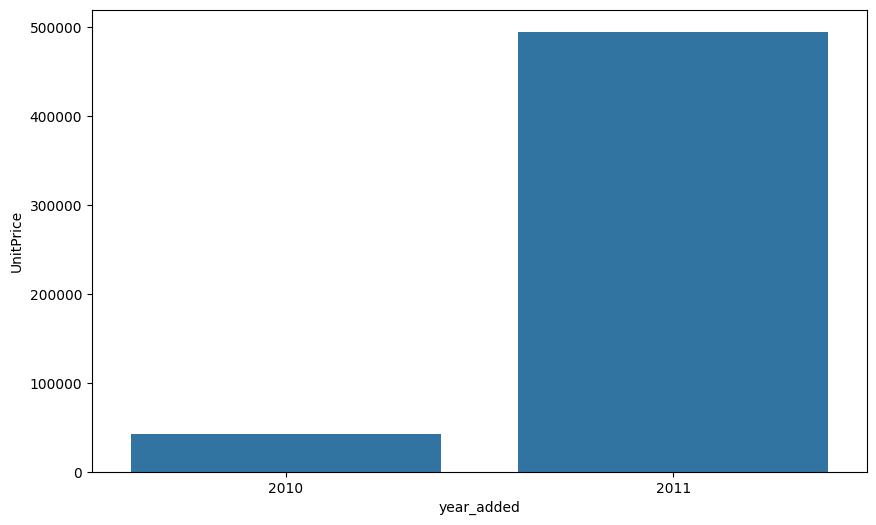

In [23]:
# Group by 'year_added' and count the number of occurrences of 'UnitPrice'
chart_1 = df.groupby("year_added")["UnitPrice"].count().reset_index()

# Display the DataFrame
chart_1
plt.figure(figsize=(10, 6))
sns.barplot(x='year_added', y='UnitPrice', data=chart_1)
plt

    month_added   UnitPrice
0             1  172003.690
1             2  126841.950
2             3  170778.300
3             4  128689.461
4             5  190058.090
5             6  200032.620
6             7  171424.581
7             8  149831.850
8             9  198308.682
9            10  261626.830
10           11  323943.250
11           12  392533.670


<ipython-input-24-2abae02c3a9e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_added', y='UnitPrice', data=chart_1, palette="gist_rainbow")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

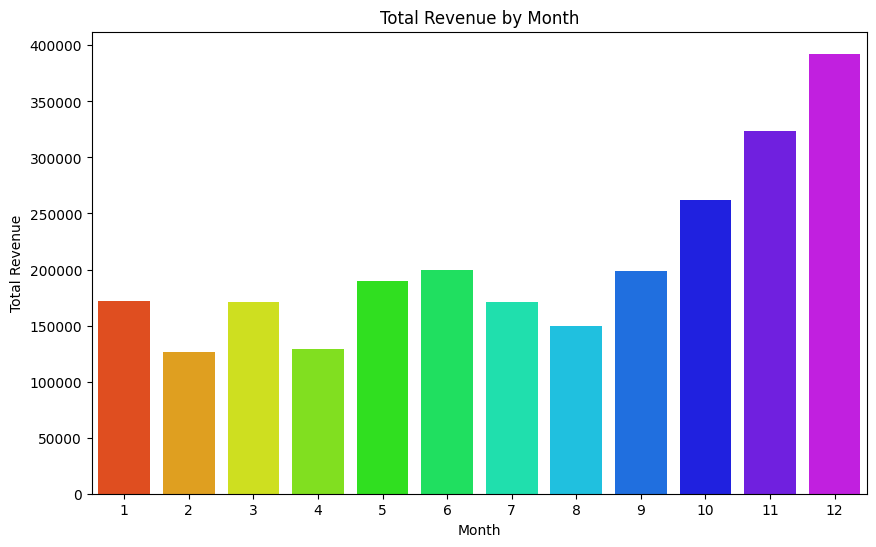

In [24]:
# Group by 'year_added' and count the number of occurrences of 'UnitPrice'
chart_1 = df.groupby("month_added")["UnitPrice"].sum().reset_index()
print(chart_1)
# Display the DataFrame
chart_1
plt.figure(figsize=(10, 6))
sns.barplot(x='month_added', y='UnitPrice', data=chart_1, palette="gist_rainbow")
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt


                 Country  year_added    UnitPrice
0              Australia        2010      136.910
1              Australia        2011     3911.090
2                Austria        2010       65.120
3                Austria        2011     1636.400
4                Bahrain        2010        3.810
..                   ...         ...          ...
56                   USA        2011      644.980
57  United Arab Emirates        2011      229.890
58        United Kingdom        2010   250650.190
59        United Kingdom        2011  1982597.414
60           Unspecified        2011     1196.410

[61 rows x 3 columns]


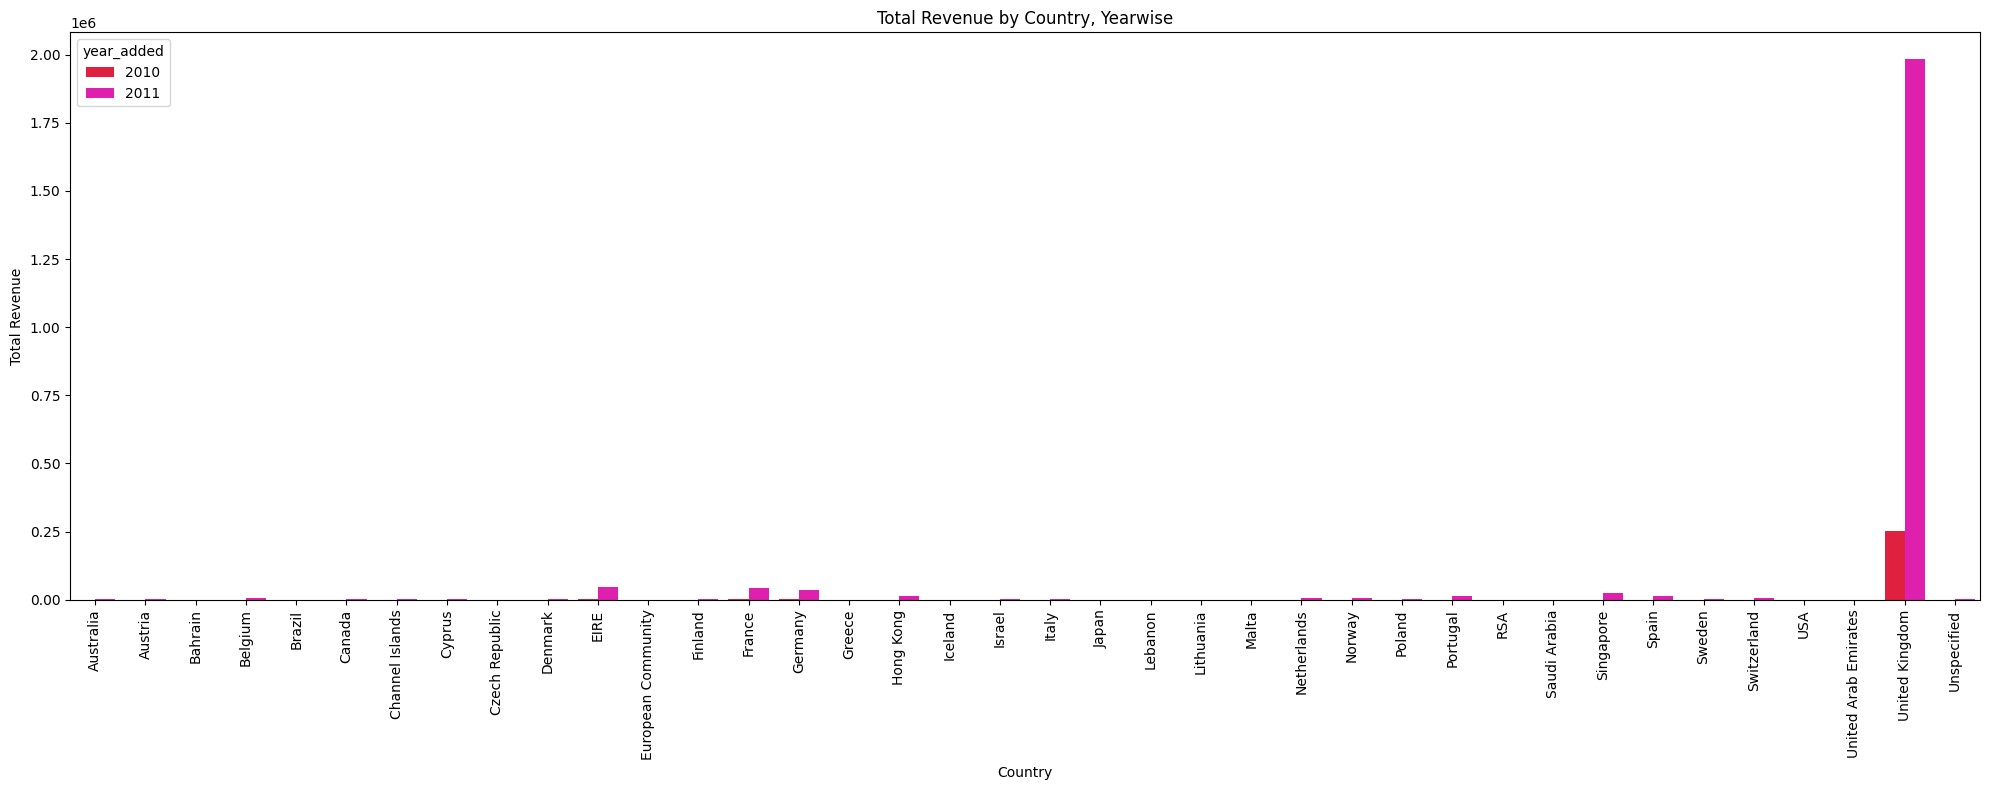

In [25]:
# Group by 'year_added' and count the number of occurrences of 'UnitPrice'
# Create the DataFrame for plotting (using chart_4 since it matches the description)
chart_4 = df.groupby(["Country", "year_added"])["UnitPrice"].sum().reset_index()

# Display the DataFrame for verification
print(chart_4)

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x='Country', y='UnitPrice', hue='year_added', data=chart_4, palette="gist_rainbow")

plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country, Yearwise')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()

In [26]:
df['Country'].value_counts()

,count
Country,
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


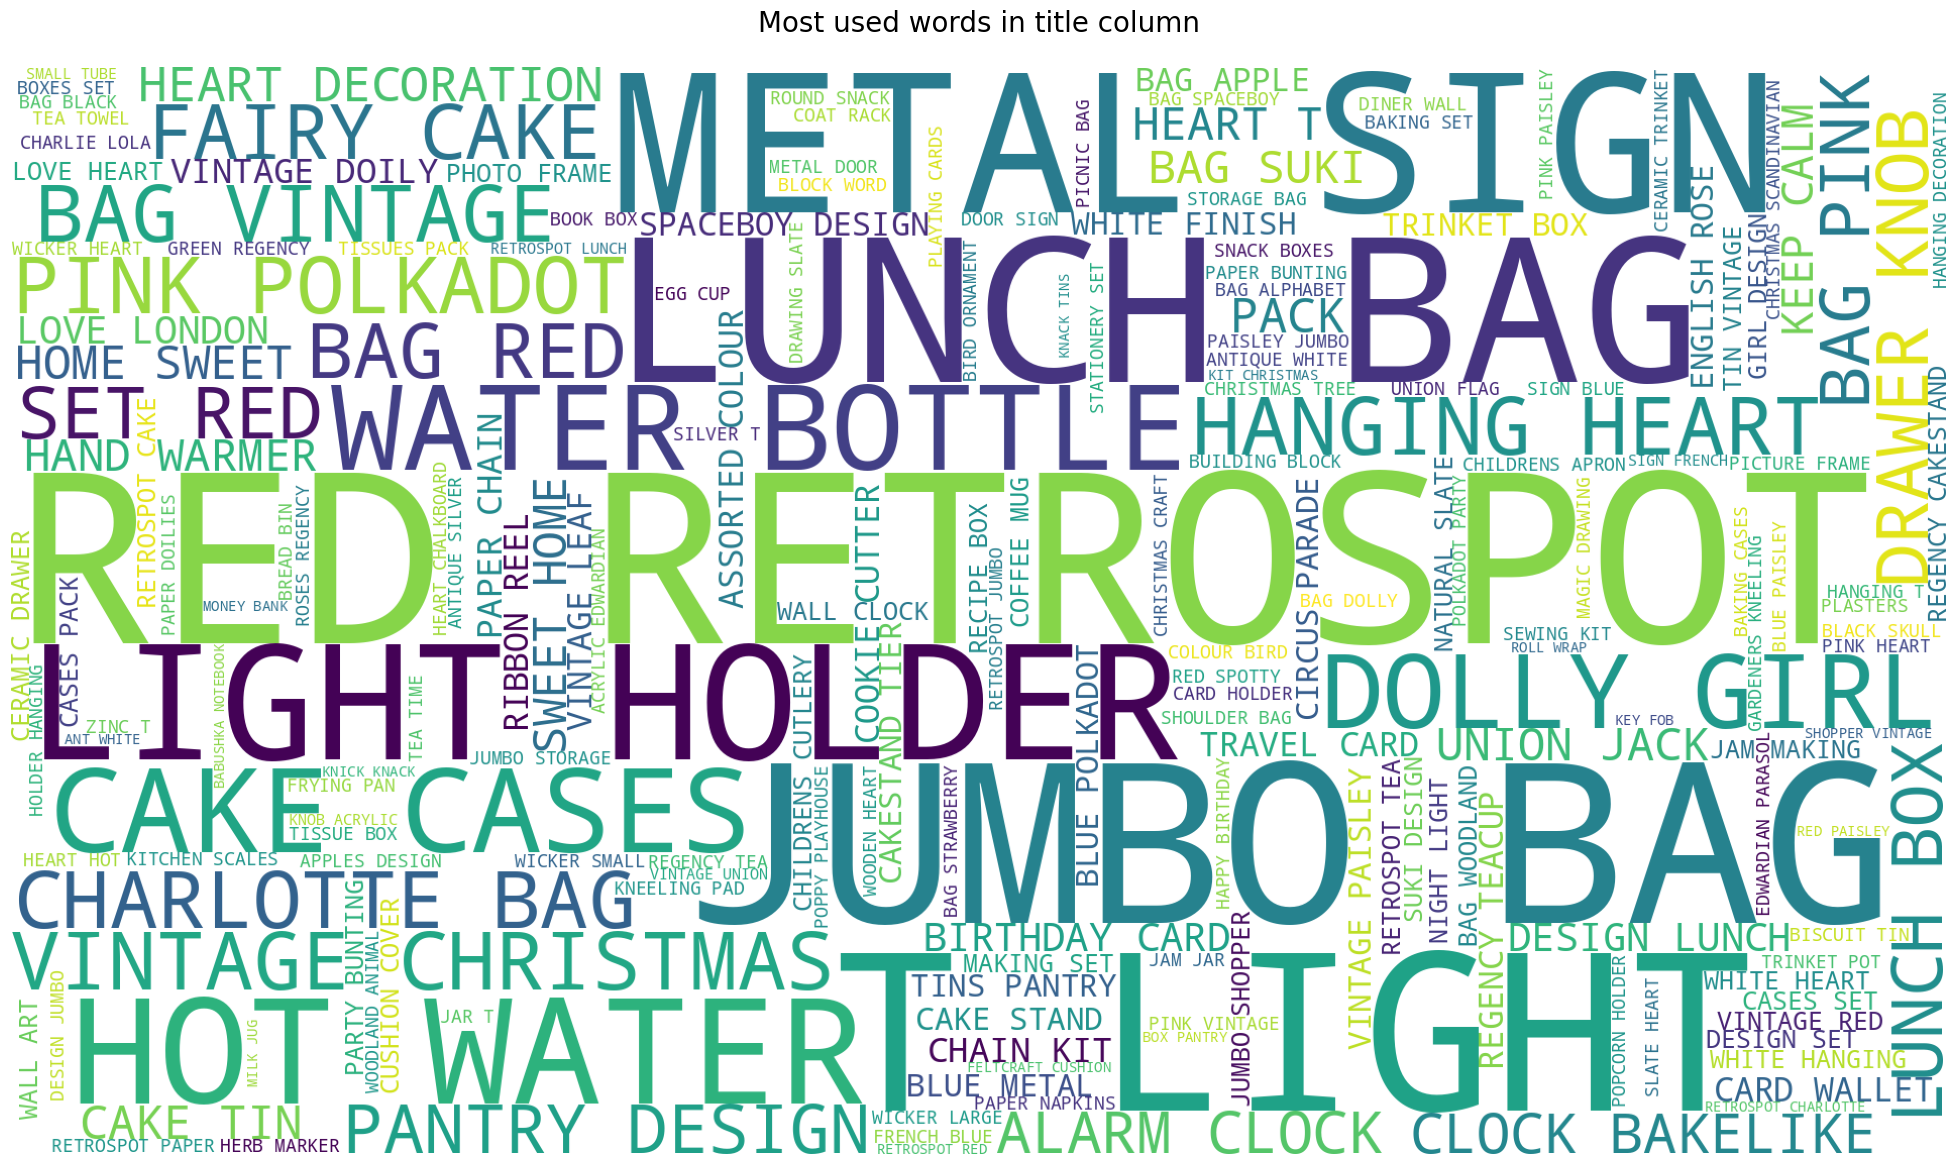

In [27]:
plt.subplots(figsize=(25,15))
# parameters for wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Description))
# Plot the image
plt.title('Most used words in title column', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()


In [28]:
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'text-data', 'date_added',
       'year_added', 'month_added'],
      dtype='object')

In [30]:
# Applying above function on our combined column
df['text-data'] = df['text-data'].apply(clean_text)

In [31]:
# we will convert all words in lowercase
df['text-data'] = df['text-data'].str.lower()

In [32]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Stemming-**

In [33]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [34]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
# Download the punkt_tab data package
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df['cleaned_text']= ''
for item, row in df.iterrows():
  df.at[item,'cleaned_text'] = filter_words(row['text-data'],stop_words)

df['cleaned_text']



,cleaned_text
0,"[white, hang, heart, tlight, holder, unit, kin..."
1,"[white, metal, lantern, unit, kingdom]"
2,"[cream, cupid, heart, coat, hanger, unit, king..."
3,"[knit, union, flag, hot, water, bottl, unit, k..."
4,"[red, woolli, hotti, white, heart, unit, kingdom]"
...,...
541904,"[pack, spaceboy, napkin, franc]"
541905,"[children, apron, dolli, girl, franc]"
541906,"[children, cutleri, dolli, girl, franc]"
541907,"[children, cutleri, circus, parad, franc]"


In [36]:
#join words fun
def join_words(x):
  return " ".join(x)

In [37]:
#final column
df['cleaned_text'] = df['cleaned_text'].apply(join_words)

In [38]:
words = df.cleaned_text
words

,cleaned_text
0,white hang heart tlight holder unit kingdom
1,white metal lantern unit kingdom
2,cream cupid heart coat hanger unit kingdom
3,knit union flag hot water bottl unit kingdom
4,red woolli hotti white heart unit kingdom
...,...
541904,pack spaceboy napkin franc
541905,children apron dolli girl franc
541906,children cutleri dolli girl franc
541907,children cutleri circus parad franc


### **using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

In [39]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df =3, max_features=2000)
# X= t_vectorizer.fit_transform(words)
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text (optional optimization)
words_cleaned = [re.sub(r'\W+', ' ', w.lower()) for w in words]

# Use optimized TF-IDF Vectorizer
t_vectorizer = TfidfVectorizer(max_df=0.9, min_df=3, max_features=1500, dtype='float32')
X = t_vectorizer.fit_transform(words_cleaned)



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2030: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


In [40]:
from sklearn.decomposition import PCA

In [41]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
# from sklearn.decomposition import PCA
# transformer = PCA(n_components=1000)
# transformer.fit(X.toarray())
# X_transformed = transformer.transform(X.toarray())
# X_transformed.shape

In [42]:
# Using IncrementalPCA
# from sklearn.decomposition import IncrementalPCA
# pca = IncrementalPCA(n_components=10, batch_size=1000) # Adjust batch_size as needed
# X_pca = pca.fit_transform(X)

# Using TruncatedSVD
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=10, random_state=42)
# X_svd = svd.fit_transform(X)

In [43]:
# vectorizing the test and train
# X_vectorized = t_vectorizer.transform(words)

In [44]:
#applying pca
from sklearn.decomposition import IncrementalPCA

# Choose a smaller number of components that fits the data structure
n_components = min(100, X.shape[1])  # Choose 100 or the max number of features

# Create an IncrementalPCA transformer instance
transformer = IncrementalPCA(n_components=n_components, batch_size=128)

# Fit the transformer with your data in batches
transformer.fit(X)

# Now transform the data
X = transformer.transform(X)



In [45]:
# transformer = PCA()
# transformer.fit(X.toarray())

In [46]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [47]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

## ***5. Cluster Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

In [48]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.6 MB/s eta 0:00:00


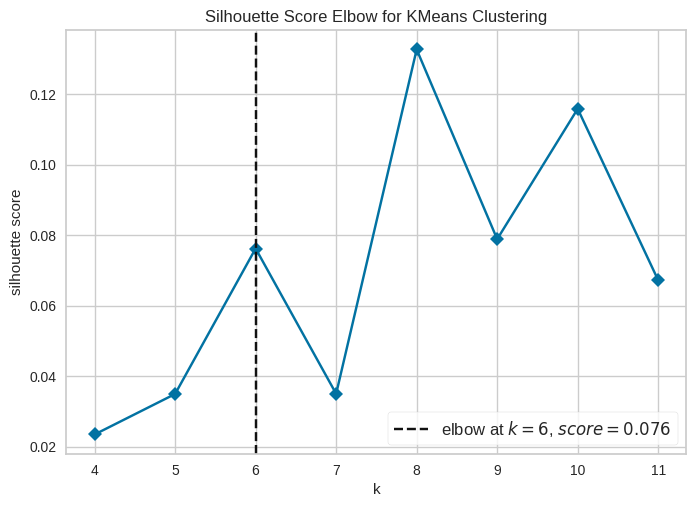

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
# from sklearn.cluster import KMeans

# from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(
#     model, k=(4,22), metric='silhouette', timings=False
# )

# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.utils import resample

# Optional: Use a subset of the data if X is very large (adjust 10000 as needed)
X_sample = resample(X, n_samples=10000, random_state=42) if len(X) > 10000 else X

# Instantiate the clustering model with parallel processing enabled
model = KMeans()

# Reduce the range of k and optimize the metric computation
visualizer = KElbowVisualizer(
    model, k=(4, 12), metric='silhouette', timings=False
)

# Fit and visualize
visualizer.fit(X_sample)
visualizer.show()


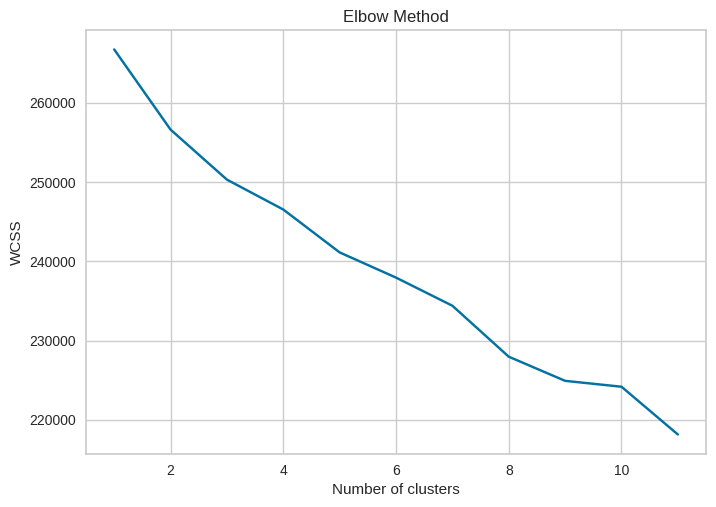

In [50]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **we will take no. of clusters as 8**

### **Dendogram**

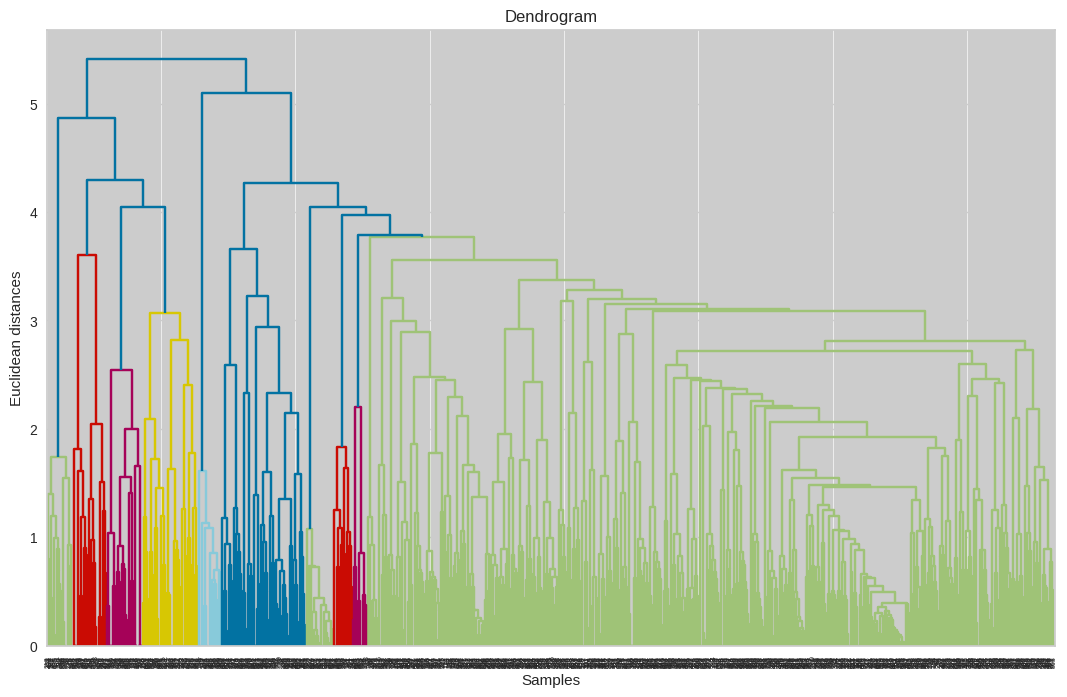

In [51]:
# Plot the dendogram
# import scipy.cluster.hierarchy as sch
# import matplotlib.pyplot as plt
# plt.figure(figsize=(13,8))


# dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
# plt.title('Dendrogram')
# plt.xlabel('Customers')
# plt.ylabel('Euclidean distances')
# plt.show()
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Sample subset for dendrogram
subset_size = min(1000, X.shape[0])
X_sample = X[np.random.choice(X.shape[0], subset_size, replace=False), :]

# Convert to dense if sparse
X_dense = X_sample.toarray() if hasattr(X_sample, 'toarray') else X_sample

# Plot dendrogram
plt.figure(figsize=(13, 8))
dendrogram = sch.dendrogram(sch.linkage(X_dense, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


#check for largest distance vertically without crossing any horizontal line

### **Agglomerative Clustering**

In [52]:
# Let's  import AgglomerativeClustering
# from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
# y_hc = hc.fit_predict(X)

In [53]:
#Alternate of above algorithm
# from sklearn.cluster import MiniBatchKMeans
# kmeans = MiniBatchKMeans(n_clusters=6, random_state=42)
# y_kmeans = kmeans.fit_predict(X)

In [54]:
# Visualizing the clusters (three dimensions only)
# plt.figure(figsize=(13,8))
# plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
# plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = '5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'cyan', label = '6')
# # plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'black', label = '7')
# # plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'lime', label = '8')
# # plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'salmon', label = '9')
# # plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'brown', label = '10')
# # plt.scatter(X[y_hc == 10, 0], X[y_hc == 10, 1], s = 100, c = 'plum', label = '11')
# # plt.scatter(X[y_hc == 11, 0], X[y_hc == 11, 1], s = 100, c = 'aqua', label = '12')
# # plt.scatter(X[y_hc == 12, 0], X[y_hc == 12, 1], s = 100, c = 'hotpink', label = '13')
# # plt.scatter(X[y_hc == 13, 0], X[y_hc == 13, 1], s = 100, c = 'pink', label = '14')
# # plt.scatter(X[y_hc == 14, 0], X[y_hc == 14, 1], s = 100, c = 'gold', label = '15')

# plt.title('Clusters of content')

# plt.legend()
# plt.show()

In [55]:
# Check Silhouette Score for each cluster
# from sklearn.cluster import AgglomerativeClustering
# silhouette_score_ = [  ]
# range_n_clusters = [i for i in range(2,16)]
# for n_clusters in range_n_clusters:
#     clusterer = AgglomerativeClustering(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(X)
#     #centers = clusterer.cluster_centers_

#     score = silhouette_score(X, preds)
#     silhouette_score_.append([int(n_clusters) , round(score , 3)])
#     print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

### **KMeans Clustering**

#### **Model fitting**

In [73]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=3, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=1)

**calculating silhouette score**

**Predicting**

In [74]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

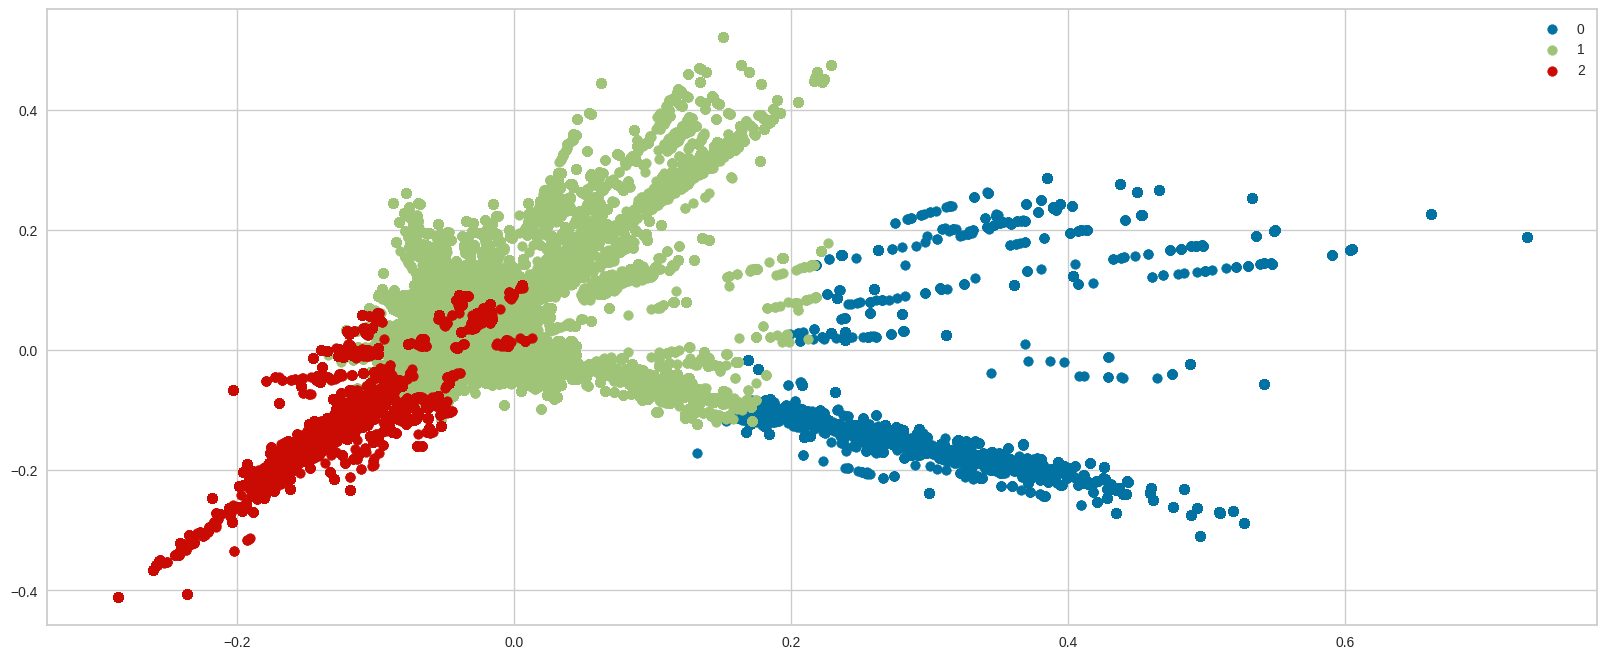

In [75]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**we now assign our clusters in our dataset by creating a new column "clusters"**

In [85]:
# Assigning clusters to our data
df = df.iloc[:X.shape[0]]  # Match lengths if you know X was a slice
df['clusters'] = kmeans.labels_

<ipython-input-85-d5bd2da636b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.labels_


In [86]:
# checking how it is working
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom


**Counting Retail products clusters**

In [88]:

# Count the number of entries in each cluster
cluster_content_count = (
   df['clusters']
    .value_counts(dropna=False)  # Include NaN if they exist
    .reset_index()
    .rename(columns={'index': 'clusters', 'clusters': 'text-data'})
)

# Display the cluster content count
print(cluster_content_count)


   text-data   count
0          1  432740
1          2   53837
2          0   50064


#### **Check all clusters**

In [89]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Defining a function to explore all the cluster using word cloud**

In [93]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_count(category):
    print("Exploring Cluster", category)
    col_names = ['text-data']  # List of columns to explore

    for i in col_names:
        # Filter the DataFrame for the specified cluster
        df_word_cloud = df[['clusters', i]].dropna()
        df_word_cloud = df_word_cloud[df_word_cloud['clusters'] == category]

        # Combine all text from the selected column
        text = " ".join(word for word in df_word_cloud[i])

        # Create stopword list
        stopwords = set(STOPWORDS)

        # Generate a word cloud image
        wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

        # Display the generated word cloud image
        plt.rcParams["figure.figsize"] = (10, 6)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

        print(f"Looking for insights from {i} of retail products")
        plt.show()


##### **Analysis of cluster 0:-**

Exploring Cluster 0
Looking for insights from text-data of retail products


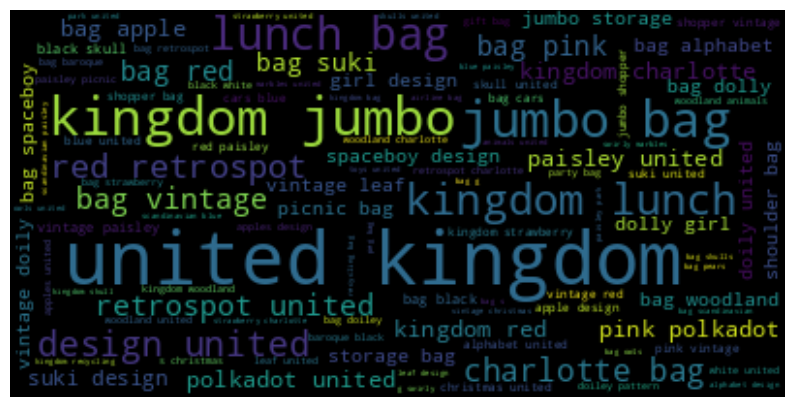

In [94]:
#Analysis of cluster 0
word_count(0)

**Analysis of cluster **



##### **Analysis of cluster 0:-**

Exploring Cluster 1
Looking for insights from text-data of retail products


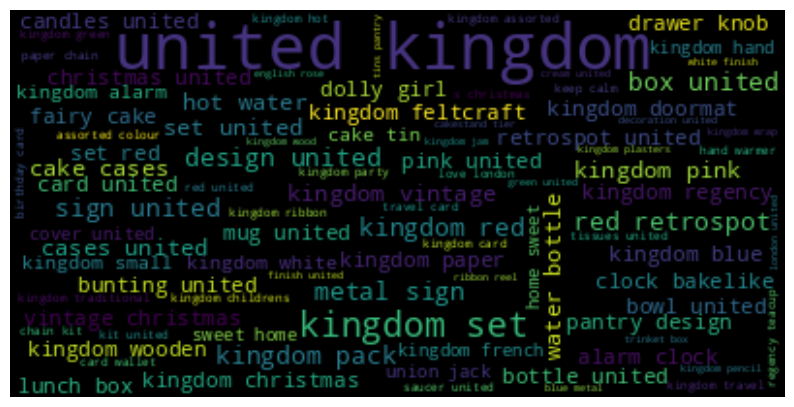

In [95]:
#Analysis of cluster 1
word_count(1)

##### **Analysis of cluster 0:-**

Exploring Cluster 2
Looking for insights from text-data of retail products


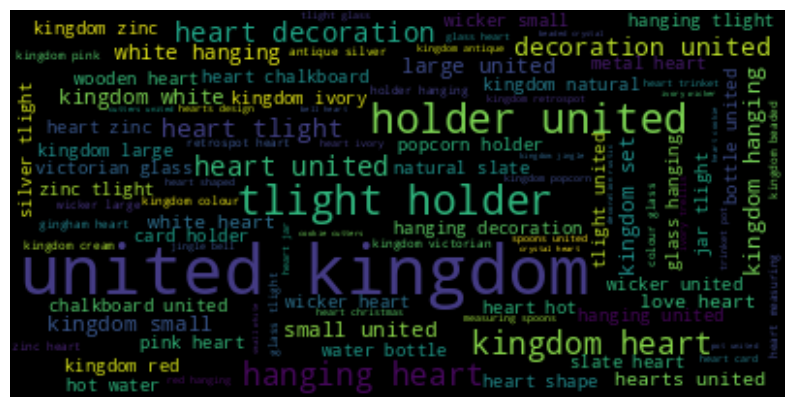

In [96]:
#Analysis of cluster 2
word_count(2)

### **Evaluation Metrics**

#### **Silhouette Score -**

In [83]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [i for i in range(2, 16)]

for n_clusters in range_n_clusters:
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Silhouette plot limits
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # KMeans clustering
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette analysis
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot: visualization of the actual clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for KMeans clustering on sample data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')

    plt.show()


###**Conclusion**

<h3>Conclusion</h3>
<p>The project successfully applied clustering techniques to analyze user review data, providing valuable insights into user sentiments and common themes. By employing both <strong>KMeans clustering</strong> and <strong>hierarchical clustering</strong>, we identified meaningful patterns in the data, such as grouping similar reviews based on sentiment, topic, or specific feedback. The project also demonstrated the use of <strong>silhouette analysis</strong> to evaluate the quality of clusters, ensuring that the clusters formed were both well-separated and cohesive.</p>
<p>The clustering process revealed that different numbers of clusters highlighted distinct themes and sentiments, enabling more focused business insights. The use of <strong>word clouds</strong> further enriched the analysis by visually representing the most frequent terms in each cluster, offering a quick snapshot of user priorities or concerns.</p>
<p>The project encountered some challenges, particularly with the high dimensionality of textual data and the computational expense of clustering and silhouette analysis on large datasets. These challenges were mitigated using <strong>dimensionality reduction</strong> techniques like <strong>PCA</strong> and efficient subsampling strategies.</p>
<p>Overall, the analysis provides a robust framework for businesses to gain actionable insights from user reviews, facilitating improved customer experience, product development, and targeted marketing strategies.</p>
<hr />
<h3>Methods and Models Used</h3>
<h4><strong>1. Data Preprocessing</strong></h4>
<ul>
<li><strong>TF-IDF Vectorization</strong>: Transformed textual data into numerical form while emphasizing important terms.</li>
<li><strong>Dimensionality Reduction (PCA)</strong>: Reduced high-dimensional data for efficient clustering and visualization.</li>
</ul>
<h4><strong>2. Clustering Techniques</strong></h4>
<ul>
<li><strong>KMeans Clustering</strong>:
<ul>
<li>Used for partitioning data into a predefined number of clusters.</li>
<li>Determined optimal cluster numbers using <strong>silhouette scores</strong>.</li>
</ul>
</li>
<li><strong>Hierarchical Clustering</strong>:
<ul>
<li>Applied with <strong>Ward&rsquo;s linkage</strong> to group data based on proximity.</li>
<li>Visualized using <strong>dendrograms</strong> to analyze cluster relationships.</li>
</ul>
</li>
</ul>
<h4><strong>3. Evaluation Metrics</strong></h4>
<ul>
<li><strong>Silhouette Score</strong>: Assessed cluster quality by measuring the separation and cohesion of data points.</li>
<li><strong>Silhouette Plots</strong>: Visualized the distribution of silhouette scores for different clusters.</li>
</ul>
<h4><strong>4. Visualization Techniques</strong></h4>
<ul>
<li><strong>Dendrograms</strong>: Displayed hierarchical relationships between clusters.</li>
<li><strong>Cluster Scatter Plots</strong>: Used PCA-reduced dimensions to visualize cluster separation.</li>
<li><strong>Word Clouds</strong>: Highlighted frequently occurring terms in each cluster to gain insights into user feedback themes.</li>
</ul>
<p>By combining these methods and models, the project delivered a comprehensive analysis of user review data, aiding in understanding user sentiments and preferences effectively.</p>